In [2]:
import numpy as np
from scipy.stats import norm, expon, chisquare
import sys
import matplotlib.pyplot as plt
import tabulate
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import math
import pandas as pd

In [3]:
gpa_file = "../data/gpa.csv"
act_file = "../data/act.csv"
hsrank_file = "../data/hsrank.csv"
intell_file = "../data/intell.csv"

hsrank_data = np.genfromtxt(hsrank_file, delimiter=',')
intell_data = np.genfromtxt(intell_file, delimiter=',')

gpa_data = np.genfromtxt(gpa_file, delimiter=',')

act_data = np.genfromtxt(act_file, delimiter=',')


#df = pd.read_csv("../data/all_dat.csv")

objective_data = np.genfromtxt("../clear_objectives.txt", delimiter=',')
effective_data = np.genfromtxt("../effective_communicator.txt", delimiter=',')

print(objective_data)


[ 4.545  4.273  3.333  4.     3.333  3.333  4.     5.     4.     3.333  5.
  5.     4.231  4.19   4.154  4.19   4.083  4.5    3.846  4.     3.     3.125
  3.     4.556  4.5    2.667  4.455  4.6    4.75   4.455  3.556  4.5    4.563
  3.875  3.5    4.353  5.     4.313  4.286  4.333  4.833  4.917  2.545
  2.75   3.846  4.     4.571  3.9    4.     4.75   4.25   4.4    4.     4.286
  3.583  3.5    4.733  4.813  4.429  4.25   4.474  5.     5.     4.     4.4
  4.5    4.067  4.25   4.481  4.75   4.556  4.455  3.167  4.111  3.867
  3.733  4.5    4.8    4.5    4.833  4.5    4.4    5.     4.625  4.75   4.5
  4.571  4.375  4.833  4.875  4.545  4.857  4.25   4.875  4.733  4.571  5.
  4.667  4.4    3.889  3.1    4.273  4.222  4.286  4.25   4.5    4.5    5.
  4.167  4.     3.5    4.333  4.083  5.     4.167  4.583  4.133  4.167  4.
  4.667  5.     4.25   4.     4.25   4.167  4.5    4.75   5.     4.8    3.875
  4.6    4.818  5.     4.769  4.273  5.     4.833  5.     4.6    3.571
  3.545  4.     4.474  

In [4]:
#print(df.keys())


X = objective_data#df.drop(['GPA'], axis=1)
y = effective_data#df[['GPA']]#gpa_data#df[['InfantMortality']]


if len(X.shape) == 1:
    print("Reshaping")
    X = X.reshape(-1, 1)


Reshaping


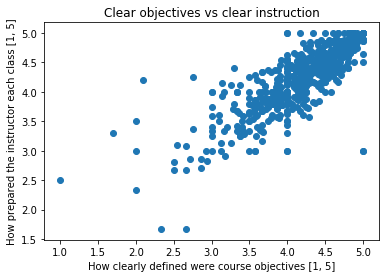

In [5]:
plt.scatter(X, y)
plt.title('Clear objectives vs clear instruction')
#plt.gca().get_yaxis().set_major_formatter(FormatStrFormatter('%0.2f'))
plt.xlabel('How clearly defined were course objectives [1, 5]')
plt.ylabel('How prepared the instructor each class [1, 5]')
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn


In [83]:
lm = LinearRegression()

In [84]:
#act_data = act_data.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)#,random_state =1500)






In [85]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

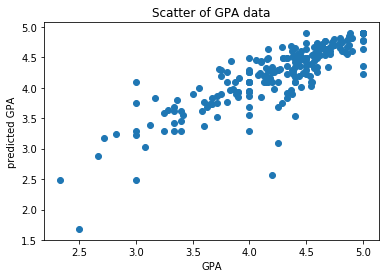

In [86]:
plt.scatter(y_test, lm.predict(X_test))
plt.title('Scatter of GPA data')
plt.xlabel('GPA')
plt.ylabel('predicted GPA')
plt.show()

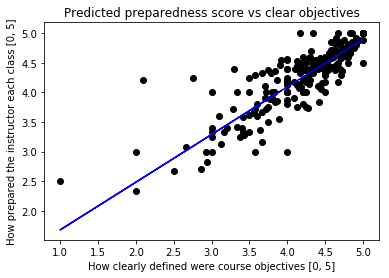

In [92]:
plt.scatter(X_test, y_test, color='k')
plt.plot(X_test, lm.predict(X_test), color='b')
plt.title('Predicted preparedness score vs clear objectives')
plt.xlabel('How clearly defined were course objectives [0, 5]')
plt.ylabel('How prepared the instructor each class [0, 5]')
plt.show()

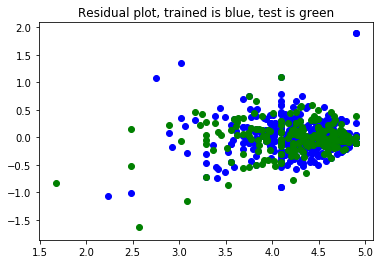

In [88]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g')
plt.title("Residual plot, trained is blue, test is green")
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(lm.predict(X_test), y_test))
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - lm.predict(X_test)) ** 2))



MSE:  0.0876620795399
Fit a model X_train, and calculate MSE with Y_train: 0.0874205918903
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0876620795399


In [90]:
print(lm.coef_, lm.intercept_)

[ 0.80483559] 0.874032087677


In [91]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, lm.predict(X_test))

print(r2)
print(lm.score(X_test, y_test))

#print(r2_score(X_test, lm.predict(y_test))
#lm.score(X.reshape(-1 ,1), lm.predict(X.reshape(-1,1))

0.706453821453
0.706453821453
